# Biophysics Problem Set 3 - Specificity - Simulation Component

## William Cerny

## Due Date: 5/14/20

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math

### Simple Code to Generate a Lock of 1s and 0s of length L 

In [2]:
def generateLock(L):
   
    array = np.random.uniform(0,1,L)
    array[array > .5] = 1
    array[array != 1] = 0
    
    return array

In [3]:
lock = generateLock(5)
key = lock.copy()

In [4]:
print(lock)
print(key)

[1. 1. 1. 0. 1.]
[1. 1. 1. 0. 1.]


### Calculate Binding Energy between Lock and Key

In [5]:
def getEnergy(lock,key):
    counter = 0
    for a,b in zip(lock,key):
        if a == b: counter += 1
    return counter

### Test that the energy function works for a lock with identical key:

In [6]:
getEnergy(lock,key)

5

### Simple Test Case for Example:

In [7]:
locks = []
N = 5

for i in range(N):
    locks.append(generateLock(10))
    
keys = [lock.copy() for lock in locks]
        
        
keys = np.array(keys)
locks = np.array(locks)

In [8]:
keys

array([[1., 0., 1., 1., 1., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 0.]])

In [9]:
locks

array([[1., 0., 1., 1., 1., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 1., 1., 0., 0., 1., 0.]])

### By the miracles of list comprehension in Python, it is possible to get the full energy matrix in one line. This is essentially a faster way to do nested for loops; ie, take a given lock, and loop through all keys, calculating the binding energy each time. Then, loop through each lock. By construction, the perfect lock-key match will be along the main diagonal.

In [10]:
energyMatrix = np.array([[getEnergy(lock,key) for key in keys] for lock in locks])

In [11]:
energyMatrix 

array([[10,  3,  5,  4,  6],
       [ 3, 10,  4,  7,  5],
       [ 5,  4, 10,  5,  5],
       [ 4,  7,  5, 10,  4],
       [ 6,  5,  5,  4, 10]])

### For easy calculation of maximum elements, set the main diagonal elements to 0. This way, a simple call to max(energyMatrix) returns the largest off-diagonal element. 

In [12]:
np.fill_diagonal(energyMatrix, 0)

In [13]:
energyMatrix

array([[0, 3, 5, 4, 6],
       [3, 0, 4, 7, 5],
       [5, 4, 0, 5, 5],
       [4, 7, 5, 0, 4],
       [6, 5, 5, 4, 0]])

In [14]:
np.max(energyMatrix)

7

# Run a simulation varying the number of locks/keys (N) for L=10:

In [15]:
def RunSimulation(L,Nmax):
    '''
    Loops through a selection of values of N, ie, the number of locks/keys. For each iteration, stores the max
    off-diagonal element, and then returns all these maximum elements at the end.
    '''
    
    ### prevent bad inputs
    assert L > 1
    assert Nmax > 5
    assert Nmax < 1000
    
    print('Generating between 2 and %d locks of length %d'%(Nmax,L))
    
    maxEnergies = []
    Nvals = np.arange(Nmax)
    
    for N in Nvals[2:]:

        ### Generate N locks 
        locks = []
        for i in range(N):  
            locks.append(generateLock(L))

        # Generate N keys    
        keys = [lock.copy() for lock in locks]
            
        ## Generate energy matrix and find maximum off diagonal element    
        keys = np.array(keys)
        locks = np.array(locks)
        energyMatrix = np.array([[getEnergy(lock,key) for key in keys] for lock in locks])
        np.fill_diagonal(energyMatrix, 0)
        maxEnergy = np.max(energyMatrix)
            
        maxEnergies.append(maxEnergy)
        del locks, keys ## free some memory
           
    return Nvals[2:], maxEnergies    

In [36]:
N_test, results = RunSimulation(L = 10, Nmax = 75)

Generating between 2 and 75 locks of length 10


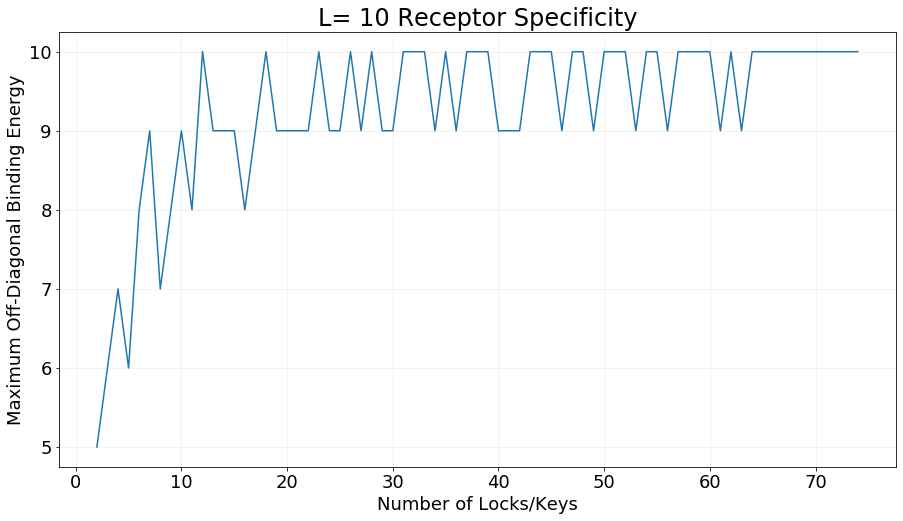

In [37]:
plt.figure(figsize = (15,8))
plt.title('L= 10 Receptor Specificity', fontsize = 24)
plt.plot(N_test,results)
plt.xlabel('Number of Locks/Keys (N)', fontsize = 18)
plt.ylabel('Maximum Off-Diagonal Binding Energy', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(alpha = .2)

# L =20

In [44]:
N_test, results = RunSimulation(L = 20, Nmax = 200)

Generating between 2 and 200 locks of length 20


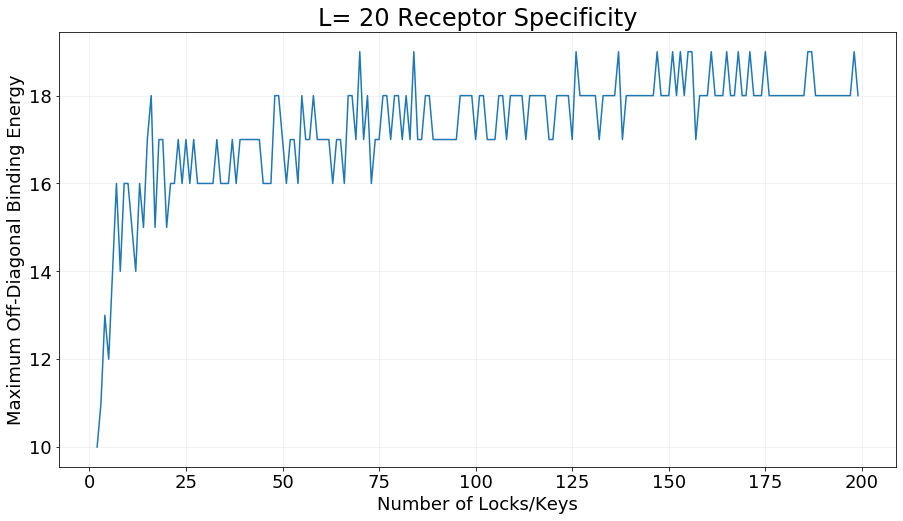

In [46]:
plt.figure(figsize = (15,8))
plt.title('L= 20 Receptor Specificity', fontsize = 24)
plt.plot(N_test,results)
plt.xlabel('Number of Locks/Keys (N)', fontsize = 18)
plt.ylabel('Maximum Off-Diagonal Binding Energy', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(alpha = .2)

# L = 40

In [47]:
N_test, results = RunSimulation(L = 40, Nmax = 500)

Generating between 2 and 500 locks of length 40


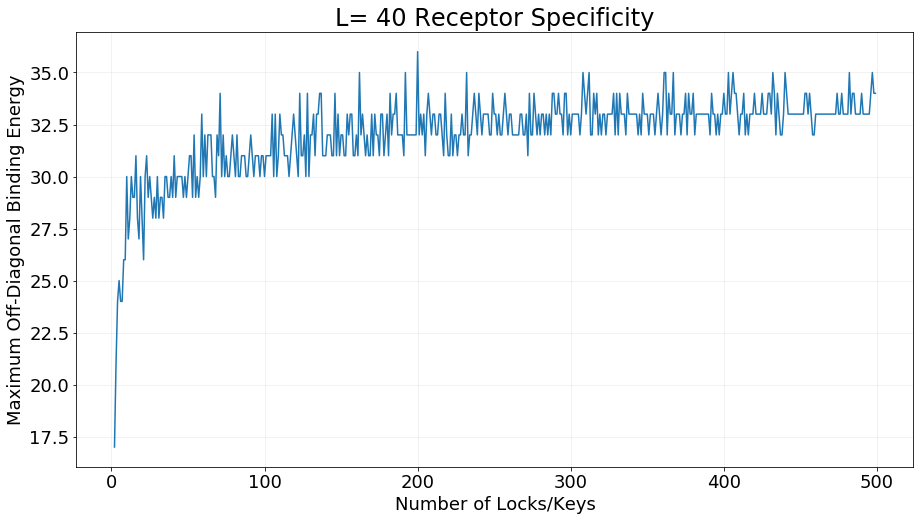

In [49]:
plt.figure(figsize = (15,8))
plt.title('L= 40 Receptor Specificity', fontsize = 24)
plt.plot(N_test,results)
plt.xlabel('Number of Locks/Keys (N)', fontsize = 18)
plt.ylabel('Maximum Off-Diagonal Binding Energy', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(alpha = .2)

## Brief Commentary:

It is clear for the L=10 case that one only needs a very small number of locks and keys before crosstalk gets to the maximal possible level, ie, keys work for >=2 locks, which I will henceforth call "complete crosstalk".  For L=20, even expanding the matrix to 200 locks/keys, there is no complete crosstalk, suggesting that it is very statistically unlikely for these kind of locks. The same trend is even more true for L=40, where the crosstalk growth curve appears to flatten out at around ~32.5, suggesting it would take *substantially* more locks/keys to get even a single instance of complete crosstalk. I quantify this effect in the following section. While it might be a bit challenging to get an exact functional form, it seems logical that the above follows a roughly logarithic trend. One might guess that this is a function related to log2(x), however, a key difference is that the behavior will essentially always converge to L given enough locks/keys. One can postulate that this condition will become true after 2^L iterations, since that is the probability of randomly generating an identical sequence to a given lock of L digits given a binary decision 1/0 for each element. However, it is generically possible that this happens quite a bit sooner, just as it is possible that a coin flip could be heads 6 times in a row. I test this kind of phenomenon below in two phases.

# Number of Locks/Keys to reach a cutoff crosstalk rate

### Based on the previous plots, I somewhat arbitrarily decide that a good cutoff capacity for exploration is about 80%, ie, I will stop increasing N when the ratio (crosstalk / sequence length) = .8. This is a very hard to motivate decision, because it is quite clear that the curves above plataeu at different relative ratios of crosstalk/sequence length.  For example, it looks quite clear that the plateau for L=20 case is at crosstalk = 18, which is 90%, while for L=40, the plateau occurs at ~33/40, which is closer to 80%. However, another consideration is runtime: it would take astronomically long for L=40 to reach 90% regularly, so I keep the cap at 80% to make this testable on a reasonable timescale.


###  Since I can save computation time by stopping when this threshold is reached, I adapt, rather than entirely reuse, the previous code. The previous function will no longer take an Nmax and will simply iterate till the threshold is met. Another optimization that I did not implement here utilizes the fact that the energy matrix is symmetric about the diagonal; this would be great to use, but would force me to have to substantially retool my existing structure, which is simplistic enough to be convenient without being too slow for slightly lower thresholds.

In [54]:
def RunSimulation_v2(L,threshold):
    '''
    An adapted version of the previous which now stops when the ratio crosstalk/L > threshold
    '''
    
    ### prevent bad inputs
    assert L > 1
    assert threshold < 1 
    assert threshold > .01
    
    
    iterations = 2
    maxEnergy = 0 
    while (iterations < 1000) & ((maxEnergy / L ) < threshold):


        ### Generate N locks 
        locks = []
        for i in range(iterations):  
            locks.append(generateLock(L))

        # Generate N keys    
        keys = [lock.copy() for lock in locks]
            
        ## Generate energy matrix and find maximum off diagonal element    
        keys = np.array(keys)
        locks = np.array(locks)
        energyMatrix = np.array([[getEnergy(lock,key) for key in keys] for lock in locks])
        
        
        np.fill_diagonal(energyMatrix, 0)
        maxEnergy = np.max(energyMatrix)
  
        iterations += 1 
        ## free some memory
        del energyMatrix   
        del locks, keys 
           
    return iterations

# Now, simply loop over a range of values for L:

In [ ]:
L_values = np.arange(2,80)[::5]

convergence_time = []
counter = 0
for Lv in L_values: 
    if(counter%2 ==0): print('On iteration %d of %d'%(counter,len(L_values)))
    results = RunSimulation_v2(L = Lv, threshold = .8)
    convergence_time.append(results)
    counter +=1

In [ ]:
plt.figure(figsize = (15,8))
plt.title('Number of Locks and Keys vs Sequence Length (cutoff = 80%)', fontsize = 24)
plt.plot(L_values,convergence_time)
plt.xlabel('Sequence Length (L)', fontsize = 18)
plt.ylabel('Number of Locks/Keys (N)', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(alpha = .2)

# ----------------------------------------------------------------------------------------------------------

### Everything below this line was written after we talked at Monday's office hours. The  thing I try below is whether the results change dramatically if the definition of the cutoff capacity becomes based on the hitting the maxcrosstalk threshold for 5 consecutive iterations.


### This is philosophically a better idea than taking the max element, because it provides statistical robustness; rather than just needing a single random fluke lock/key combination with high crosstalk, it requires that the sequence length has clearly caused a higher-than-cutoff maximum energy outside of the "natural error bar" provided by the random simulation noise.

## Programatically, this is a very simple change. I simply adapt runSimulation (version 2) from before:

In [85]:
def RunSimulation_v3(L,threshold):
    '''
    An adapted version of the previous which now forces 3 values of N in a row to achieve the cutoff before 
    I increment to a larger value of L, thus providing statistically robust results.
    '''
    
    ### prevent bad inputs
    assert L > 1
    assert threshold < 1 
    assert threshold > .01
    
    
    iterations = 2
    maxEnergy = 0 
    counter = 0 
    while (iterations < 10000) & (counter < 5):


        ### Generate N locks 
        locks = []
        for i in range(iterations):  
            locks.append(generateLock(L))

        # Generate N keys    
        keys = [lock.copy() for lock in locks]
            
        ## Generate energy matrix and find maximum off diagonal element    
        keys = np.array(keys)
        locks = np.array(locks)
        energyMatrix = np.array([[getEnergy(lock,key) for key in keys] for lock in locks])
        
        
        np.fill_diagonal(energyMatrix, 0)
        maxEnergy = np.max(energyMatrix)
  
        iterations += 1 
    
        if ((maxEnergy / L ) > threshold): counter = counter + 1
        else: counter = 0 ### reset the counter if you do not pass threshold consecutively 
    
    
        ## free some memory
        del energyMatrix   
        del locks, keys 
        
    counter = 0       
    return iterations

### The runtime here is too long for practical study if I use threshold of even 75% or 80%, so I switch to 70%.

In [115]:
L_values_part1 = np.arange(2,50)
L_values_part2 = np.arange(51,75)[::2]

L_values = np.concatenate([L_values_part1,L_values_part2])
convergence_time = []
counter = 0
for Lv in L_values: 
    if(counter%5 ==0): print('On iteration %d of %d'%(counter,len(L_values)))
    results = RunSimulation_v3(L = Lv, threshold = .70)
    convergence_time.append(results)
    counter +=1

On iteration 0 of 60
On iteration 5 of 60
On iteration 10 of 60
On iteration 15 of 60
On iteration 20 of 60
On iteration 25 of 60
On iteration 30 of 60
On iteration 35 of 60
On iteration 40 of 60
On iteration 45 of 60
On iteration 50 of 60
On iteration 55 of 60


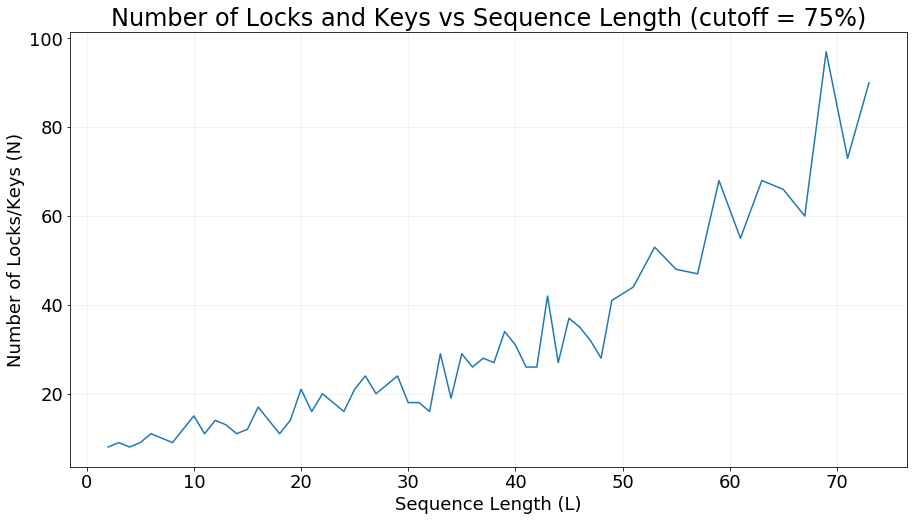

In [116]:
plt.figure(figsize = (15,8))
plt.title('Number of Locks and Keys vs Sequence Length (cutoff = 75%)', fontsize = 24)
plt.plot(L_values,convergence_time, label = 'Simulated')


plt.xlabel('Sequence Length (L)', fontsize = 18)
plt.ylabel('Number of Locks/Keys (N)', fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(alpha = .2)

### As the above makes clear, the result is still very nosiy. However, it is quite a bit better than the previous iteration, so the statistical robustness added by demanding multiple consecutive crosstalks above capacity did help to some degree. The clear exponential relationship shows up again, but this time more convincingly. 